         motor1_x  motor1_y  motor1_z     sound                         time
0        0.004470  0.000683 -0.113217 -0.007836  2024-04-22T14:19:00.188683Z
1       -0.004681 -0.000264 -0.028029 -0.006258  2024-04-22T14:19:00.188883Z
2       -0.007521  0.000683  0.077050 -0.001526  2024-04-22T14:19:00.189083Z
3        0.010781  0.000683  0.099140 -0.007836  2024-04-22T14:19:00.189283Z
4        0.010465  0.000367 -0.045382 -0.008152  2024-04-22T14:19:00.189483Z
...           ...       ...       ...       ...                          ...
1499995  0.007941  0.000683 -0.076933 -0.005627  2024-04-22T16:17:00.405099Z
1499996 -0.007836  0.000367  0.036657 -0.006574  2024-04-22T16:17:00.405298Z
1499997  0.000998  0.000998  0.032555 -0.006574  2024-04-22T16:17:00.405499Z
1499998  0.010781  0.000683 -0.084821 -0.007836  2024-04-22T16:17:00.405699Z
1499999  0.002261  0.000998  0.025928 -0.005943  2024-04-22T16:17:00.405899Z

[1500000 rows x 5 columns]


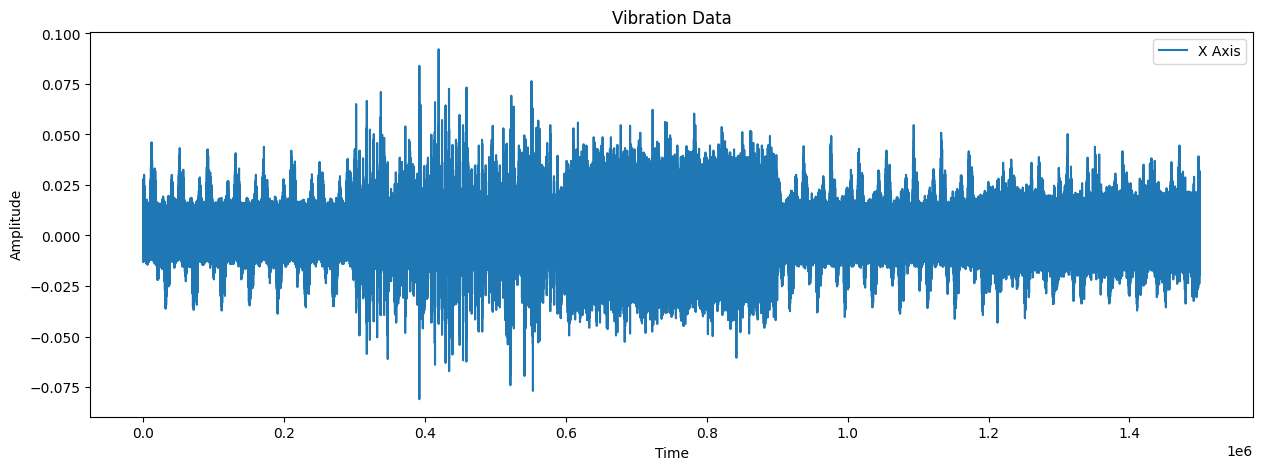

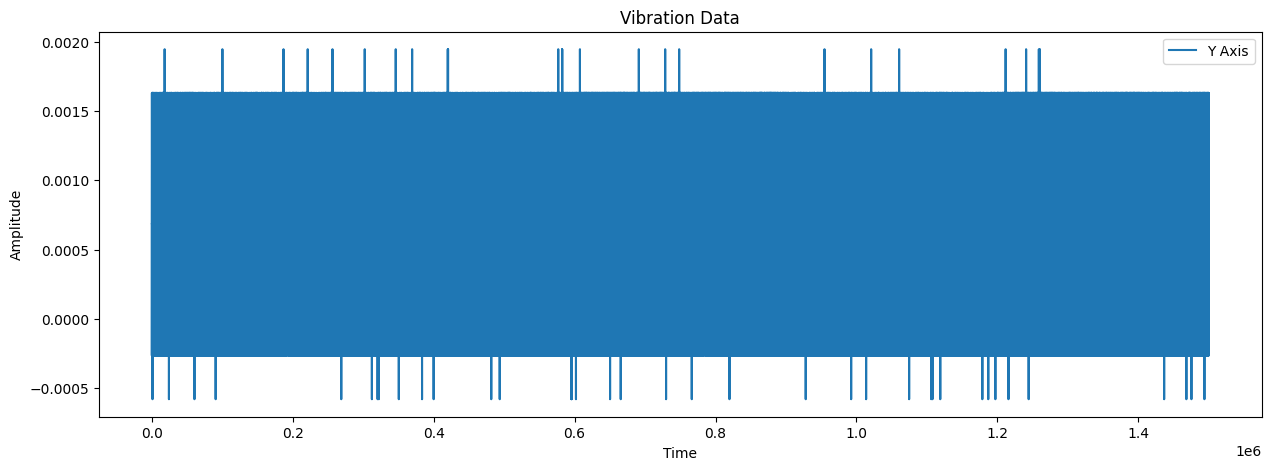

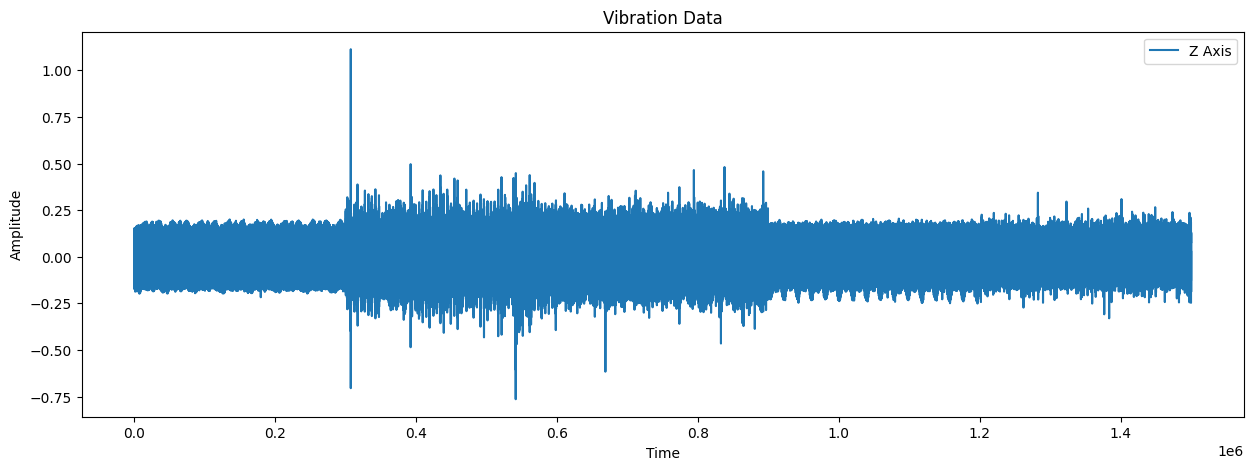

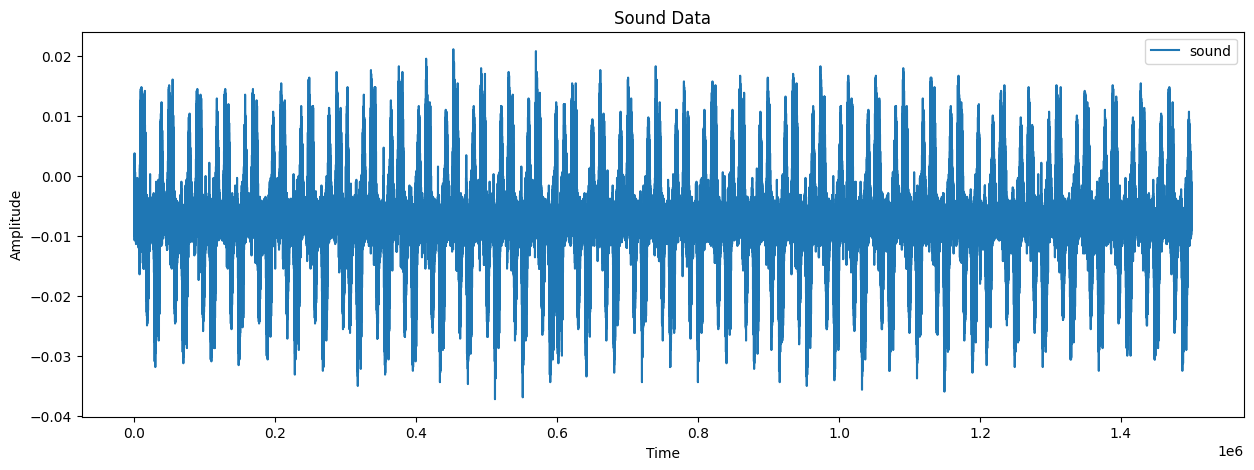

In [1]:
# 데이터 시각화
import numpy as np
import pandas as pd
import random
import seaborn as sns
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# 데이터 파일을 읽어옵니다.
normal_data = pd.read_csv("./csv/5000hz/300rpm/300rpm normal data/stream2024_4_22_23_19.csv")
carriage_data = pd.read_csv("./csv/5000hz/300rpm/300rpm carriage damage/stream2024_4_23_2_54.csv")
highspeed_data = pd.read_csv("./csv/5000hz/300rpm/300rpm high-speed damage/stream2024_4_23_0_20.csv")
lack_data = pd.read_csv("./csv/5000hz/300rpm/300rpm lack of lubrication/stream2024_4_23_2_6.csv")
corrosin = pd.read_csv("./csv/5000hz/300rpm/300rpm oxidation and corrosion/stream2024_4_23_1_16.csv")

combined_data = pd.concat([normal_data, carriage_data, highspeed_data, lack_data, corrosin], ignore_index=True)

print(combined_data)

plt.figure(figsize=(15, 5))
plt.plot(combined_data['motor1_x'], label='X Axis')
#plt.plot(normal_data['motor1_y'], label='Y Axis')
#plt.plot(normal_data['motor1_z'], label='Z Axis')
plt.title('Vibration Data')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

plt.figure(figsize=(15, 5))
#plt.plot(combined_data['motor1_x'], label='X Axis')
plt.plot(combined_data['motor1_y'], label='Y Axis')
#plt.plot(combined_data['motor1_z'], label='Z Axis')
plt.title('Vibration Data')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

plt.figure(figsize=(15, 5))
#plt.plot(combined_data['motor1_x'], label='X Axis')
#plt.plot(combined_data['motor1_y'], label='Y Axis')
plt.plot(combined_data['motor1_z'], label='Z Axis')
plt.title('Vibration Data')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

plt.figure(figsize=(15, 5))
#plt.plot(combined_data['motor1_x'], label='X Axis')
#plt.plot(combined_data['motor1_y'], label='Y Axis')
plt.plot(combined_data['sound'], label='sound')
plt.title('Sound Data')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

Epoch 1/100


/Users/kimdozz0/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3750/3750 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.5825 - loss: 0.6636 - val_accuracy: 0.6039 - val_loss: 0.6475
Epoch 2/100
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.6021 - loss: 0.6493 - val_accuracy: 0.6074 - val_loss: 0.6458
Epoch 3/100
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.6047 - loss: 0.6470 - val_accuracy: 0.6104 - val_loss: 0.6433
Epoch 4/100
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.6072 - loss: 0.6446 - val_accuracy: 0.6124 - val_loss: 0.6414
Epoch 5/100
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.6082 - loss: 0.6431 - val_accuracy: 0.6135 - val_loss: 0.6401
Epoch 6/100
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.6100 - loss: 0.6419 - val_accuracy: 0.6152 - val_loss: 0.6392
Epoch 7/100
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6098 - loss: 0.6419 - val_accuracy: 0.6168 - val_loss: 0.6383
Epoch 8/100
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6118 - loss: 0.640

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 64)          │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 90,341 (352.90 KB)

 Trainable params: 30,113 (117.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 60,228 (235.27 KB)

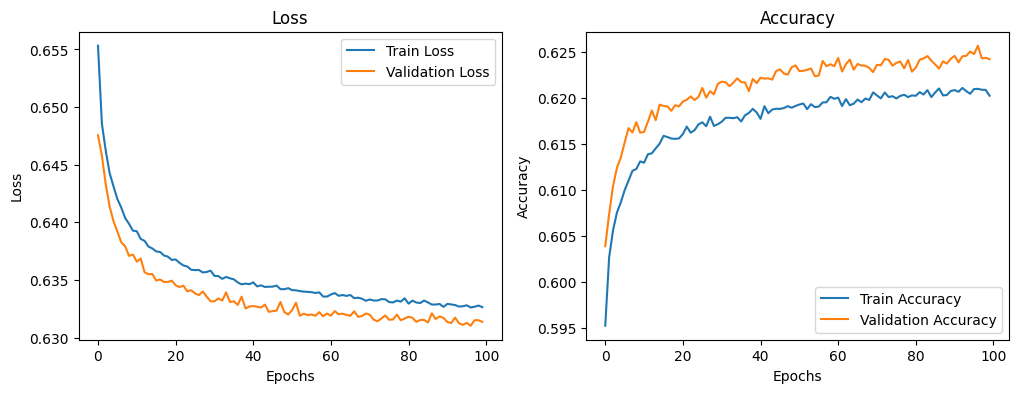

3750/3750 ━━━━━━━━━━━━━━━━━━━━ 3s 748us/step - accuracy: 0.6266 - loss: 0.6314
Test Loss: 0.631028950214386
Test Accuracy: 0.6257249712944031


In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# 데이터 파일 로드
normal_data = pd.read_csv("./csv/5000hz/300rpm/300rpm normal data/stream2024_4_22_23_19.csv")
carriage_data = pd.read_csv("./csv/5000hz/300rpm/300rpm carriage damage/stream2024_4_23_2_54.csv")

# 정상 데이터에 레이블 0(정상) 할당, 비정상 데이터에 레이블 1(비정상) 할당
normal_data['label'] = 0
carriage_data['label'] = 1

# 데이터 결합
combined_data = pd.concat([normal_data, carriage_data], ignore_index=True)

# X, Y, Z 축 데이터와 레이블 선택
features = combined_data[['motor1_x', 'motor1_y', 'motor1_z', 'sound']]
labels = combined_data['label']

# 데이터 정규화
scaler = StandardScaler()
X = scaler.fit_transform(features)

# 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=30)

# LSTM 입력을 위해 데이터 형태 변경
# (샘플 수, 타임 스텝, 피쳐 수)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# LSTM 모델 생성
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))  # 이진 분류 출력 레이어

# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 모델 훈련
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test), callbacks=[early_stopping])

# 모델 서머리
model.summary()

# 훈련 과정에서의 손실과 정확도를 확인
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# 훈련 및 검증 데이터에 대한 손실 그래프
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 훈련 및 검증 데이터에 대한 정확도 그래프
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# 모델을 평가
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

GPU가 없거나 설정되지 않았습니다. CPU로 계속 진행합니다.
Epoch 1/100


/Users/kimdozz0/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4688/4688 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - accuracy: 0.3146 - loss: 1.5183 - val_accuracy: 0.3453 - val_loss: 1.4791
Epoch 2/100
4688/4688 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.3444 - loss: 1.4817 - val_accuracy: 0.3481 - val_loss: 1.4732
Epoch 3/100
4688/4688 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.3473 - loss: 1.4777 - val_accuracy: 0.3500 - val_loss: 1.4710
Epoch 4/100
4688/4688 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.3484 - loss: 1.4749 - val_accuracy: 0.3502 - val_loss: 1.4686
Epoch 5/100
4688/4688 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.3491 - loss: 1.4730 - val_accuracy: 0.3516 - val_loss: 1.4677
Epoch 6/100
4688/4688 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.3501 - loss: 1.4716 - val_accuracy: 0.3527 - val_loss: 1.4666
Epoch 7/100
4688/4688 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.3503 - loss: 1.4703 - val_accuracy: 0.3529 - val_loss: 1.4656
Epoch 8/100
4688/4688 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 0.3505 - loss: 1.470

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 1, 64)          │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 90,737 (354.45 KB)

 Trainable params: 30,245 (118.14 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 60,492 (236.30 KB)

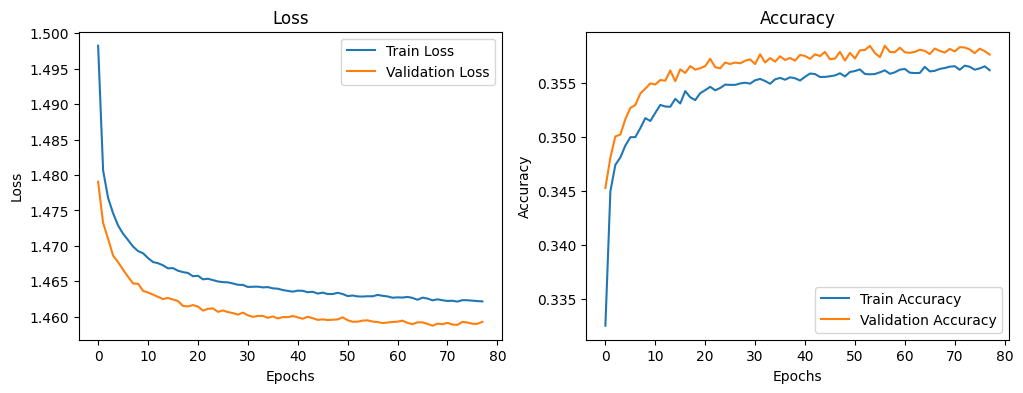

9375/9375 ━━━━━━━━━━━━━━━━━━━━ 5s 518us/step - accuracy: 0.3591 - loss: 1.4575
Test Loss: 1.4587363004684448
Test Accuracy: 0.35793668031692505


In [2]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import EarlyStopping
from tensorflow.python.keras.utils import np_utils
import tensorflow as tf
import matplotlib.pyplot as plt

# GPU 설정
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) == 0:
    print("GPU가 없거나 설정되지 않았습니다. CPU로 계속 진행합니다.")
else:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

# 데이터 파일 로드
# 각 고장 유형에 대한 데이터가 다른 폴더에 위치하는 경우를 가정
# 각 폴더에서 데이터를 로드하고 레이블을 할당한 후 데이터 결합

# 정상 데이터에 레이블 0(정상) 할당
normal_data = pd.read_csv("./csv/5000hz/300rpm/300rpm normal data/stream2024_4_22_23_19.csv")
normal_data['label'] = 'normal'

# 각 고장 유형에 대한 데이터를 로드하고 해당 레이블 할당
carriage_data = pd.read_csv("./csv/5000hz/300rpm/300rpm carriage damage/stream2024_4_23_2_54.csv")
carriage_data['label'] = 'carriage_data'

highspeed_data = pd.read_csv("./csv/5000hz/300rpm/300rpm high-speed damage/stream2024_4_23_0_20.csv")
highspeed_data['label'] = 'highspeed_data'

lack_data = pd.read_csv("./csv/5000hz/300rpm/300rpm lack of lubrication/stream2024_4_23_2_6.csv")
lack_data['label'] = 'lack_data'

corrosin = pd.read_csv("./csv/5000hz/300rpm/300rpm oxidation and corrosion/stream2024_4_23_1_16.csv")
corrosin['label'] = 'corrosin'

# 데이터 결합
combined_data = pd.concat([normal_data, carriage_data, highspeed_data, lack_data, corrosin], ignore_index=True)

# X, Y, Z 축 데이터와 레이블 선택
features = combined_data[['motor1_x', 'motor1_y', 'motor1_z', 'sound']]
labels = combined_data['label']

# 데이터 정규화
scaler = StandardScaler()
X = scaler.fit_transform(features)

# 레이블 인코딩
encoder = LabelEncoder()
y = encoder.fit_transform(labels)
y = np_utils.to_categorical(y)  # 원-핫 인코딩

# 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

# LSTM 입력을 위해 데이터 형태 변경
# (샘플 수, 타임 스텝, 피쳐 수)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# LSTM 모델 생성
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dense(y_train.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 모델 훈련
history = model.fit(X_train, y_train, epochs=100, batch_size=256, validation_data=(X_test, y_test), callbacks=[early_stopping])



# 모델 서머리
model.summary()

# 훈련 과정에서의 손실과 정확도를 확인
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# 훈련 및 검증 데이터에 대한 손실 그래프
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 훈련 및 검증 데이터에 대한 정확도 그래프
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# 모델을 평가
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


In [ ]:
import tensorflow as tf
print("Available GPUs:", len(tf.config.experimental.list_physical_devices('GPU')))
